In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!dir

 Volume in drive F is New Volume
 Volume Serial Number is 6A7D-E31B

 Directory of F:\nordic Internship\projects\Success_prediction_of_app\notebooks

29-09-2021  04:52 PM    <DIR>          .
29-09-2021  04:52 PM    <DIR>          ..
29-09-2021  03:58 PM    <DIR>          .ipynb_checkpoints
29-09-2021  04:52 PM           127,917 1.Playstore-cleaning.ipynb
24-09-2021  05:03 PM           538,687 2.Playstore_visualization.ipynb
24-09-2021  04:52 PM           746,023 3.Playstore-EDA&response.ipynb
21-09-2021  09:12 PM           126,823 4.Playstore-regressionModels.ipynb
22-09-2021  10:09 AM           817,183 5.Playstore-featureSelection.ipynb
24-09-2021  06:20 PM           338,730 6.Playstore-Regression_catboost.ipynb
               6 File(s)      2,695,363 bytes
               3 Dir(s)  33,633,873,920 bytes free


In [5]:
cd ..

F:\nordic Internship\projects\Success_prediction_of_app


In [6]:
data = pd.read_csv('google-playstore-apps/Google-Playstore-Cleaned.csv.gz',compression='gzip')

In [7]:
data

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,Adventure,True,0.0,10.0,7.1,19,19,Everyone,False,False,10,12
1,Tools,True,0.0,2.9,5.0,16,4,Everyone,True,False,5000,6331
2,Productivity,True,0.0,3.7,4.0,25,25,Everyone,False,False,50,54
3,Communication,True,0.0,1.8,4.0,36,35,Everyone,True,False,10,14
4,Tools,True,0.0,6.2,4.1,19,34,Everyone,False,False,100,289
...,...,...,...,...,...,...,...,...,...,...,...,...
2135250,Education,True,0.0,10.0,4.1,40,33,Everyone,True,False,1000,1490
2135251,Education,True,0.0,44.0,4.1,44,43,Everyone,False,False,100,265
2135252,Education,True,0.0,29.0,5.0,37,37,Everyone,False,False,100,151
2135253,Music & Audio,True,0.0,10.0,5.0,61,4,Everyone,True,False,1000,1817


**DataFrame** which consist onli **Numerical** columns ...

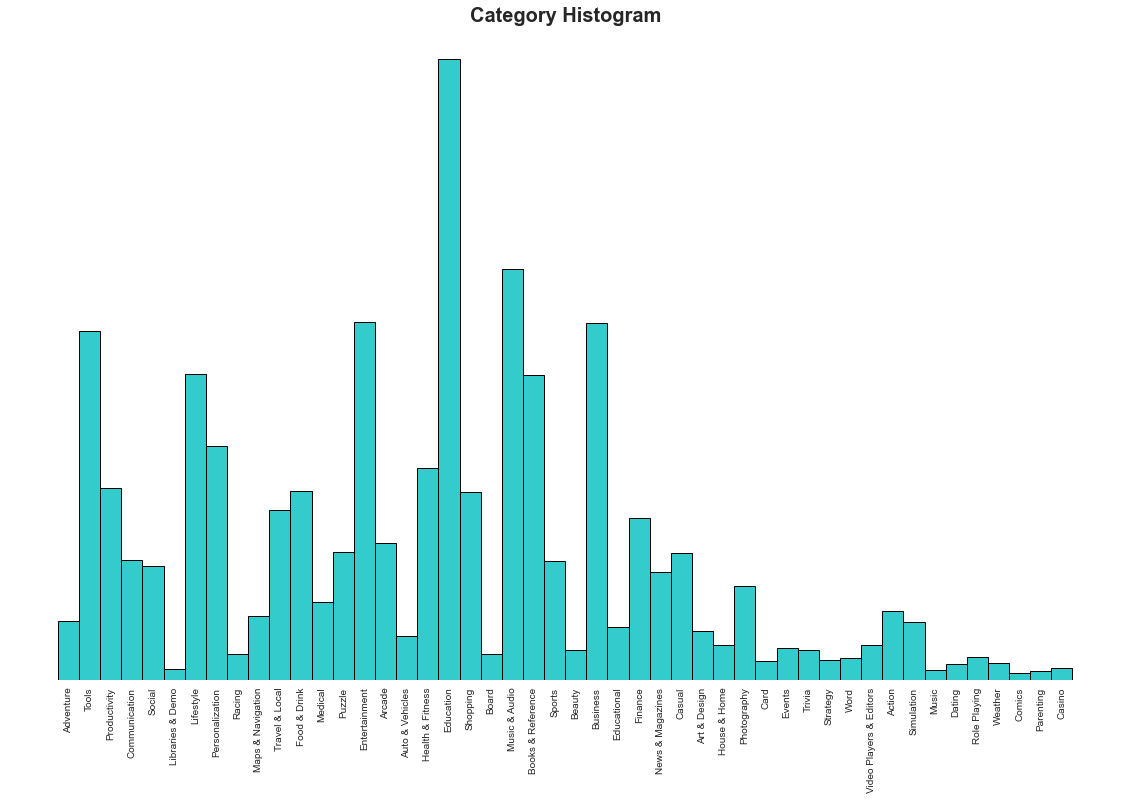

In [21]:
fig1,ax = plt.subplots(figsize = (20,12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Category Histogram",weight = 'bold',fontsize = 20)
sns.histplot(x = 'Category',data = data,bins=50,color = 'c',alpha = 0.8,edgecolor='k')
plt.xticks(rotation = 90,weight = 'normal',fontsize = 10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
plt.grid(False)
plt.savefig("images/Category_Histogram.png")
plt.show()

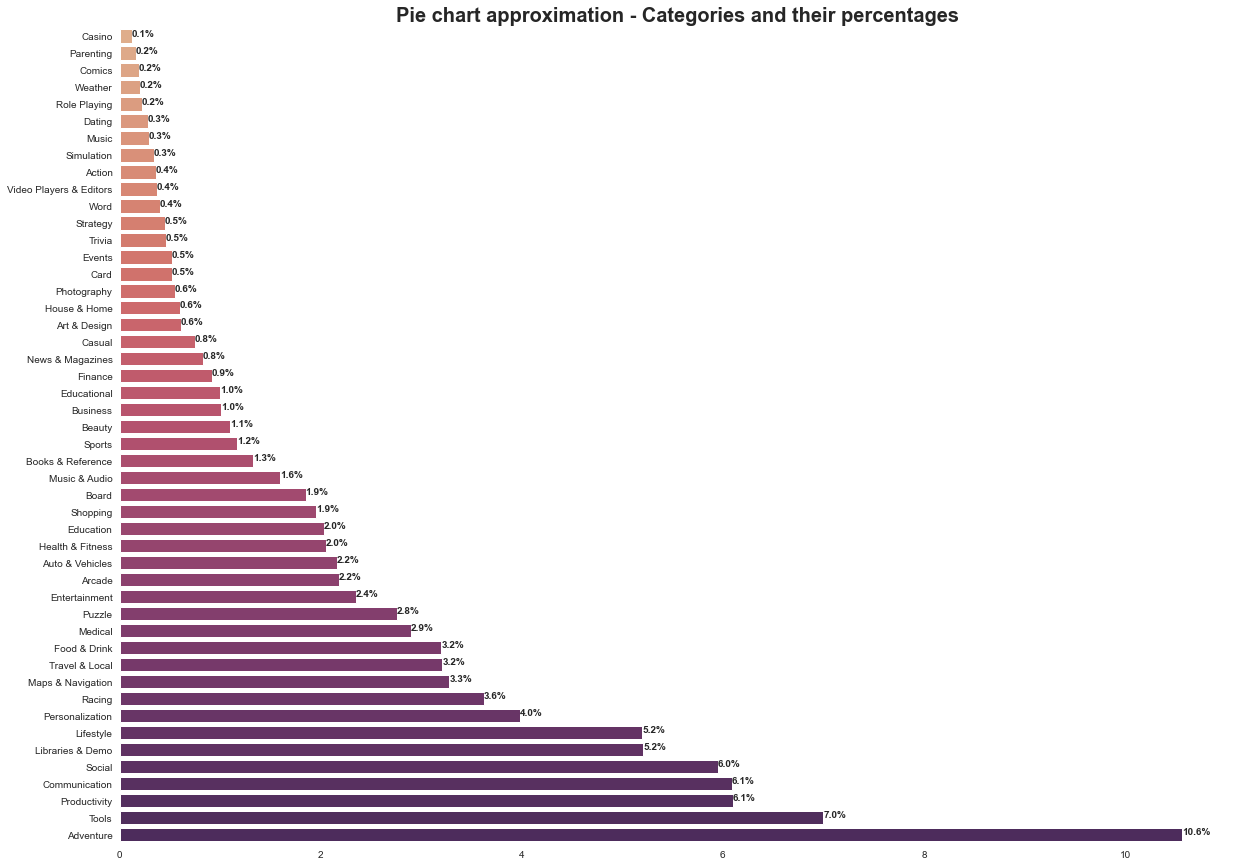

In [34]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
a_list = ((data['Category'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Category'].unique().tolist()
b_list.reverse()
ax = sns.barplot(x=a_list, y=b_list, data=data, ci=None, palette="flare",orient='h' )
ax.set_title("Pie chart approximation - Categories and their percentages", fontsize=20,weight = 'bold')
ax.set_yticklabels(labels=b_list)
ax.grid(False)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(),weight = 'bold' )
bar.savefig("images/Category pie chart approximation.png");

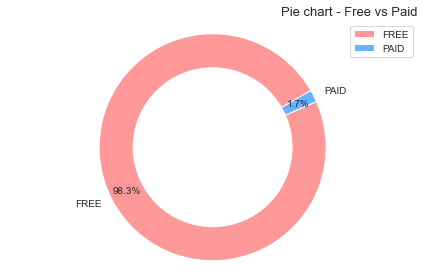

In [23]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['FREE','PAID']
sizes = [ len(data[data['Free'] == True].index.to_list()) , len(data[data['Free'] == False].index.to_list())]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
ax1.set_title("Pie chart - Free vs Paid", fontsize=13 ,loc = 'right')
plt.tight_layout()
plt.legend()
plt.savefig('images/free_Paid-pieChart.png')
plt.show()

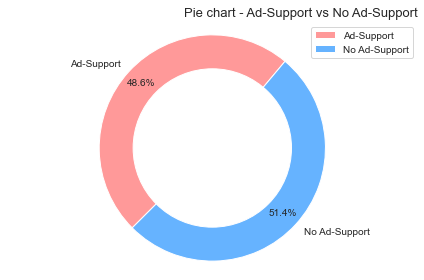

In [24]:
import matplotlib.pyplot as plt
# Pie chart
a_list = ((data['Ad_Support'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Ad_Support'].unique().tolist()
b_list.reverse()
labels = b_list
sizes = a_list
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=['Ad-Support','No Ad-Support'], autopct='%1.1f%%', startangle=50, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.set_title("Pie chart - Ad-Support vs No Ad-Support", fontsize=13 ,loc = 'right')
plt.tight_layout()
plt.legend()
plt.savefig('images/Ad_supported_pieChart.png')
plt.show()

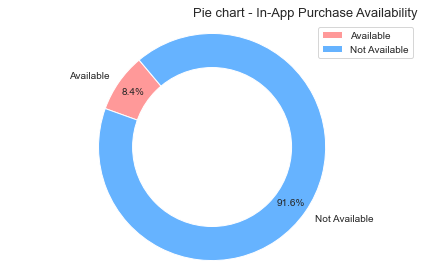

In [25]:
import matplotlib.pyplot as plt
# Pie chart
a_list = ((data['Inapp_Purchase'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Inapp_Purchase'].unique().tolist()
b_list.reverse()
labels = b_list
sizes = a_list
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=['Available','Not Available'], autopct='%1.1f%%', startangle=130, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.set_title("Pie chart - In-App Purchase Availability", fontsize=13 ,loc = 'right')
plt.tight_layout()
plt.legend()
plt.savefig('images/Inapp_Purchases_pieChart.png')
plt.show()

<ipython-input-26-aaf7ca55cdf3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=dataset['Average_Downloads'].values.tolist(),fontsize = 12)


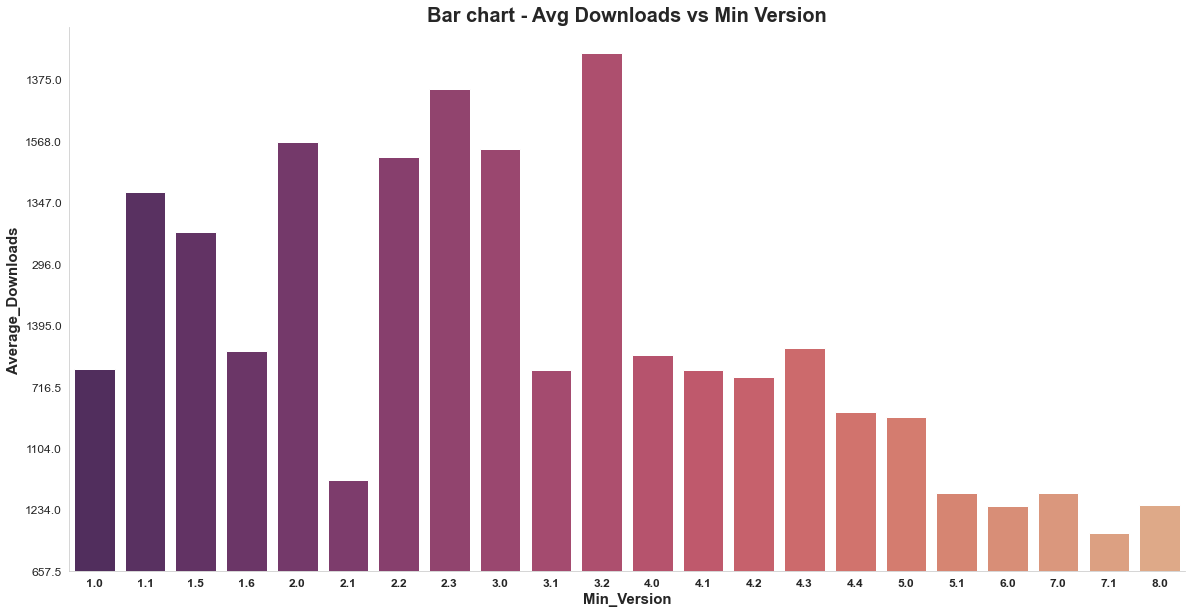

In [26]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
dataset = data.groupby('Min_Version')['Average_Downloads'].median().to_frame()
ax = sns.barplot(x =dataset.index, y='Average_Downloads', data=dataset, ci=None, palette="flare_r",orient='v' )
ax.set_title("Bar chart - Avg Downloads vs Min Version", fontsize=20, weight = 'bold')
ax.set_yticklabels(labels=dataset['Average_Downloads'].values.tolist(),fontsize = 12)
ax.set_xticklabels(labels=dataset.index.tolist(),fontsize = 12, weight='bold')
plt.xlabel('Min_Version',fontsize = 15, weight = 'bold')
plt.ylabel('Average_Downloads', fontsize = 15, weight = 'bold')
ax.grid(False)
bar.savefig("images/BarChart-Avg_Downloads vs Min_Version.png");

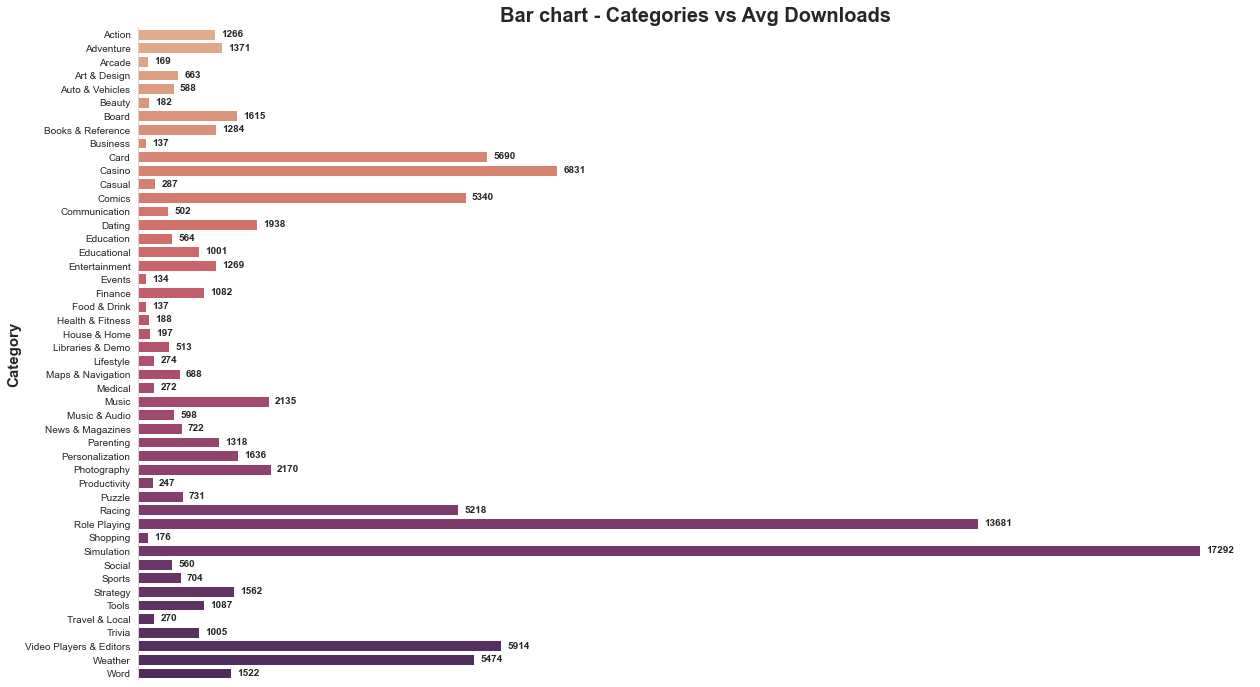

In [27]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
dataset1 = data.groupby('Category')['Average_Downloads'].median().to_frame()
ax = sns.barplot(x='Average_Downloads', y=dataset1.index, data=dataset1, ci=None, palette="flare",orient='h' )
ax.set_title("Bar chart - Categories vs Avg Downloads", fontsize=20,weight = 'bold',loc = 'center')
ax.grid(False)
ax.set_ylabel("Category",fontsize = 15, weight = 'bold')
ax.set_xlabel("")
ax.set_xticks([])
def show_values_on_bars(axs, h_v="v"):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + 100
                _y = p.get_y() + p.get_height() -0.25
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left" ,fontsize = 10, weight = 'bold')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax, "h")
bar.savefig("images/BarChart-Categories vs Average_Downloads.png");

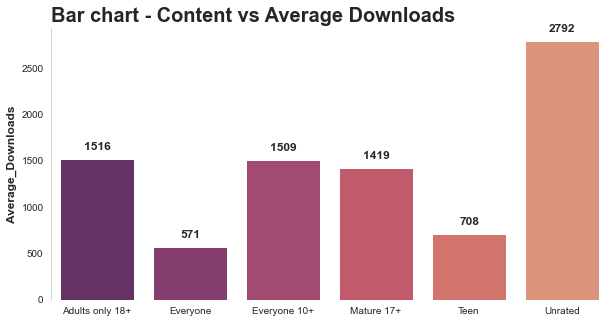

In [28]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
dataset2 = data.groupby('Content')['Average_Downloads'].median().to_frame()
ax = sns.barplot(x=dataset2.index, y='Average_Downloads', data=dataset2, ci=None, palette="flare_r",orient='v' )
ax.set_title("Bar chart - Content vs Average Downloads", fontsize=20,weight = 'bold',loc = 'left')
ax.set_xlabel("")
ax.set_ylabel("Average_Downloads",fontsize = 12, weight = 'bold')
ax.grid(False)
def show_values_on_bars(axs, h_v="v"):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() +100
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center",fontsize = 12, weight = 'bold') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + 50
                _y = p.get_y() + p.get_height() -0.3
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax, "v")
bar.savefig("images/BarChart-Content vs Average_Downloads.png");

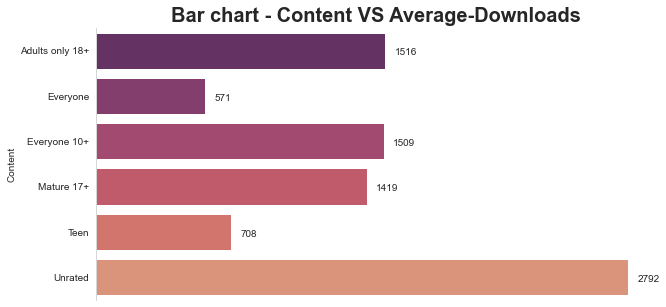

In [33]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax = sns.barplot(x='Average_Downloads', y=dataset2.index, data=dataset2, ci=None, palette="flare_r",orient='h' )
ax.set_title("Bar chart - Content VS Average-Downloads", fontsize=20,weight = 'bold',loc = 'center')
ax.grid(False)
ax.set_xlabel("")
ax.set_xticks([])
def show_values_on_bars(axs, h_v="v"):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + 50
                _y = p.get_y() + p.get_height() -0.3
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax, "h")
bar.savefig("images/BarChart-Content vs Average_Downloads_h.png");

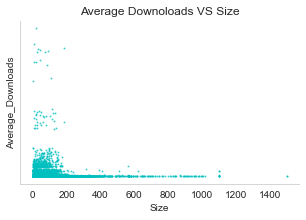

In [30]:
fig, ax = plt.subplots(figsize = (5,3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.plot('Size', 'Average_Downloads',data = data,color = 'c',
        marker='o', linestyle='none', markersize=1, alpha=0.6)

# Label
ax.set_yticks([])
ax.grid(False)
ax.set(title='Average Downoloads VS Size',
       xlabel='Size', 
       ylabel='Average_Downloads')
plt.savefig("images/Scatter plot- Avg_downloads vs Size.png");
plt.show();

<AxesSubplot:xlabel='Average_Downloads', ylabel='Content'>

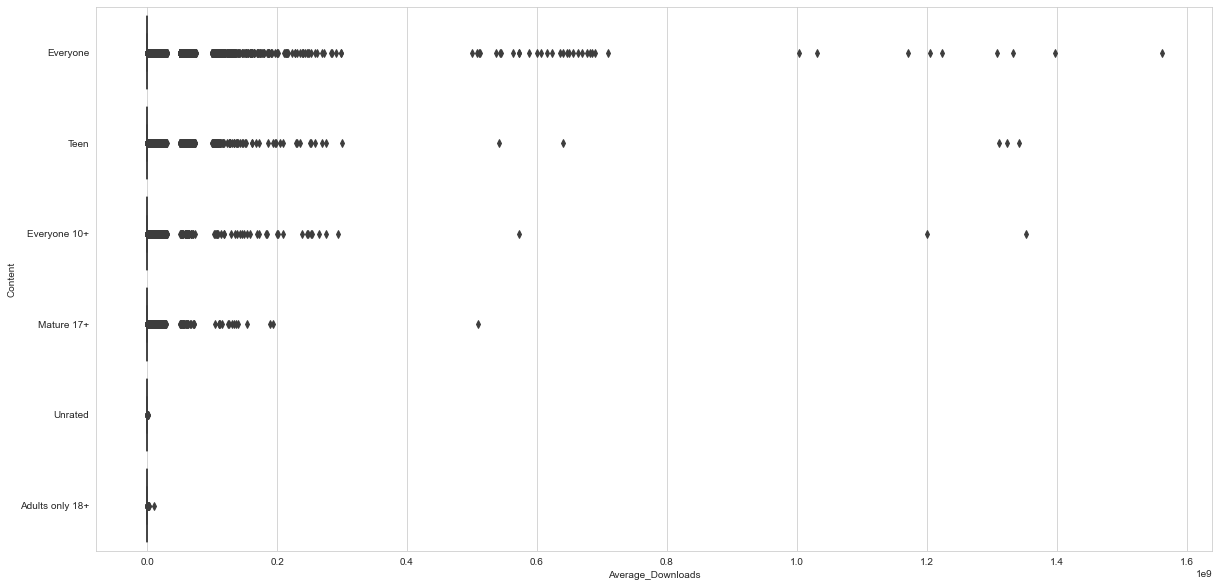

In [31]:
sns.set_style("whitegrid")
plot,ax = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'Average_Downloads', y = 'Content', data = data,orient = 'h')

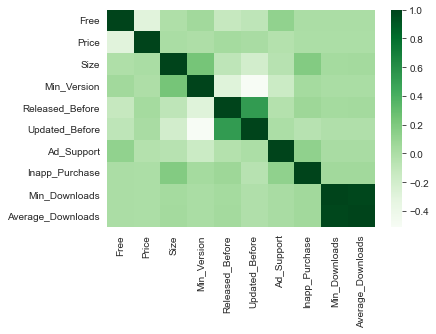

In [32]:
sns.heatmap(data.corr(), cmap="Greens", annot=False)
plt.savefig("images/Correlation heatmap.png");
plt.show()